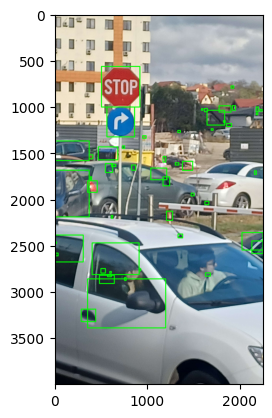

[(283, 3190, 157, 135), (352, 2863, 845, 530), (752, 2848, 17, 32), (480, 2824, 161, 89), (568, 2815, 41, 25), (1626, 2798, 54, 35), (592, 2783, 17, 18), (910, 2752, 17, 24), (496, 2751, 49, 49), (8, 2584, 25, 30), (401, 2474, 508, 342), (0, 2464, 16, 16), (2129, 2453, 121, 135), (0, 2389, 305, 291), (1330, 2378, 51, 41), (2022, 2362, 228, 189), (608, 2177, 16, 31), (1205, 2131, 67, 99), (1621, 2024, 43, 37), (1472, 1936, 32, 30), (353, 1802, 103, 125), (1168, 1760, 72, 97), (382, 1759, 14, 31), (2158, 1695, 19, 39), (0, 1688, 369, 505), (1036, 1665, 172, 126), (828, 1632, 45, 56), (611, 1623, 46, 25), (544, 1616, 79, 97), (1300, 1608, 39, 24), (1378, 1592, 111, 98), (1168, 1540, 30, 61), (369, 1521, 39, 43), (467, 1436, 212, 140), (730, 1425, 23, 27), (0, 1372, 369, 212), (948, 1315, 37, 28), (1328, 1258, 28, 22), (1688, 1240, 23, 16), (1856, 1183, 53, 33), (1823, 1152, 17, 20), (2176, 1071, 17, 18), (1644, 1040, 191, 160), (2216, 1032, 25, 17), (1583, 1023, 17, 17), (1616, 1021, 32, 

In [28]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Load the image
image = cv.imread('easy.jpg')

# Transform into HSV
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define lower and upper bounds for the red color range
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Create a mask for the red color range
mask_red = cv.inRange(image_hsv, lower_red, upper_red)

# Define lower and upper bounds for the blue color range
lower_blue = np.array([100, 50, 50])   # Example lower range for blue color in HSV
upper_blue = np.array([130, 255, 255]) # Example upper range for blue color in HSV

# Create a mask for the blue color range
mask_blue = cv.inRange(image_hsv, lower_blue, upper_blue)

mask = mask_red + mask_blue
# Find contours in the mask
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

bboxes = []
for contour in contours:
    # Calculate bounding rectangle
    x, y, w, h = cv.boundingRect(contour)

    # Calculate aspect ratio
    aspect_ratio = w / float(h)

    # Calculate area
    area = cv.contourArea(contour)

    # Filter contours based on area and aspect ratio
    if 200 < area < 500000 and 0.4 < aspect_ratio < 1.9:
        bboxes.append((x, y, w, h))

# Convert image back to RGB for displaying with matplotlib
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Draw bounding boxes on the image
for bbox in bboxes:
    x, y, w, h = bbox
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)

# Display the image with bounding boxes
plt.imshow(image)
plt.show()

print(bboxes)


In [ ]:



# # 2. Calculate HOG
# im = np.float32(image_hsv) / 255.0

# # Calculate gradient
# gx = cv.Sobel(image, cv.CV_32F, 1, 0, ksize=1)
# gy = cv.Sobel(image, cv.CV_32F, 0, 1, ksize=1)

# # Python Calculate gradient magnitude and direction ( in degrees )
# mag, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)

# # Function to split the image into 8x8 blocks
# def split_into_blocks(image, block_size=(8, 8)):
#     height, width = image.shape[:2]
#     blocks = []
#     for y in range(0, height, block_size[0]):
#         for x in range(0, width, block_size[1]):
#             block = image[y:y + block_size[0], x:x + block_size[1]]
#             blocks.append(block)
#     return blocks

# blocks = split_into_blocks(image_hsv)
